### San Francisco vs Los Angeles Housing Prices

#### Introduction:
California's housing market is shaped by various factors, including population growth, economic opportunities, and geographical constraints. Los Angeles and San Francisco, two prominent cities, exhibit distinct housing market traits. Our study will focus on the disparity in average house prices between these cities in 1990 and the factors influencing these variations. 

We will use mean housing prices as the location parameter, offering a representative measure of central tendency, and the inter-quartile range (IQR) will serve as the scale parameter, accessing the spread of housing prices within each market. The dataset includes housing prices, property features, and location-specific variables, alongside supplementary data on economic indicators, housing market trends, and population demographics. 

*Glaeser & Gyourko (2018)* and *Hipp & Singh (2014)* provide insights into the economic implications of housing markets and the relationship between housing policy and urban development, aiding our understanding of the complex California housing market, specifically in Los Angeles and San Francisco. 


#### Preliminary Results:
To process our data set properly we'll need to load the necessary libraries and then load the .csv file into the notebook

In [22]:
# Load libraries that are necessary for data processing
library(repr)
library(tidyverse)
library(broom)
library(repr)
library(infer)

In [23]:
# Load dataset into notebook and display first 6-rows of ca_homes
ca_homes <- read_csv("data/California_Houses.csv")
head(ca_homes)

Rows: 20640 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Median_House_Value, Median_Income, Median_Age, Tot_Rooms, Tot_Bedr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
452600,8.3252,41,880,129,322,126,37.88,-122.23,9263.041,556529.2,735501.8,67432.52,21250.21
358500,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733,554279.9,733236.9,65049.91,20880.60
352100,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085,554610.7,733525.7,64867.29,18811.49
341300,5.6431,52,1274,235,558,219,37.85,-122.25,7768.087,555194.3,734095.3,65287.14,18031.05
342200,3.8462,52,1627,280,565,259,37.85,-122.25,7768.087,555194.3,734095.3,65287.14,18031.05
269700,4.0368,52,919,213,413,193,37.85,-122.25,7768.087,555194.3,734095.3,65287.14,18031.05


We can then filter the original data set into smaller sample sets for further processing and manipulation. We'll start by filtering the two cities based on the approximate longitudinal and latitudinal boundaries.

In [24]:
# Filter lA homes from dataset based on Latitude boundaries
la_homes <- ca_homes %>%
    filter(Latitude > 33.924 & Latitude < 34.202)

# Further filter LA homes from la_homes sample based on Longitude boundaries
la_homes <- la_homes %>%
    filter(Longitude < -118.131 & Longitude > -118.549)

# Select variables that are of interest to sample
la_homes <- la_homes %>%
    select(Median_House_Value, Median_Income, Tot_Rooms, Tot_Bedrooms, Latitude, Longitude, Distance_to_LA)

# Display first 6-rows of la_homes sample
head(la_homes)

Median_House_Value,Median_Income,Tot_Rooms,Tot_Bedrooms,Latitude,Longitude,Distance_to_LA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
187500,1.0000,161,48,34.20,-118.42,23094.74
181700,3.0125,4138,1171,34.20,-118.38,20673.95
177200,2.0348,2594,1028,34.20,-118.39,21245.21
171800,2.9861,2199,609,34.20,-118.37,20128.58
170400,2.8917,1438,309,34.20,-118.37,20128.58
176400,4.1445,2921,685,34.19,-118.36,18689.88


In [25]:
# Filter SF homes from dataset based on Latitude boundaries
sf_homes <- ca_homes %>%
    filter(Latitude > 37.71 & Latitude < 37.815)

# Further filter SF homes from la_homes sample based on Longitude boundaries
sf_homes <- sf_homes %>%
    filter(Longitude < -122.347 & Longitude > -122.523)

# Select variables that are of interest to sample
sf_homes <- sf_homes %>%
    select(Median_House_Value, Median_Income, Tot_Rooms, Tot_Bedrooms, Latitude, Longitude, Distance_to_SanFrancisco)

# Display first 6-rows of sf_homes sample
head(sf_homes)

Median_House_Value,Median_Income,Tot_Rooms,Tot_Bedrooms,Latitude,Longitude,Distance_to_SanFrancisco
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
500001,3.6728,1178,545,37.81,-122.41,4421.669
500001,1.8981,3991,1311,37.81,-122.41,4421.669
500001,4.3472,1314,317,37.81,-122.42,4127.286
500001,8.0755,2852,581,37.80,-122.42,3059.710
500001,4.9211,4985,1355,37.80,-122.42,3059.710
500001,3.2356,2494,731,37.80,-122.42,3059.710


We now have our two sample sets and can easily calculate sample summary statistics

In [26]:
# Calculate mean of Median_House_Value for each city
la_homes_mean <- mean(la_homes$Median_House_Value)
sf_homes_mean <- mean(sf_homes$Median_House_Value)

la_homes_mean
sf_homes_mean

[1] 246327.5

[1] 344885.2

For initial comparison of the two cities we can plot a histogram that shows the distribution of the median house values in each sample set. The median house value is the median house value of the households within a block. 

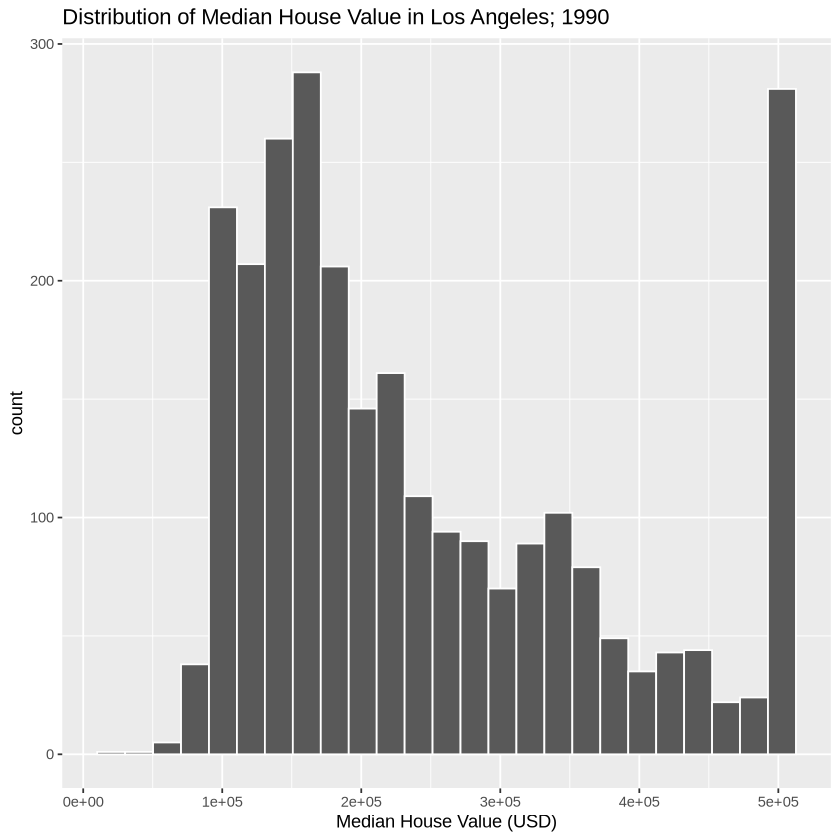

In [27]:
# Plot distribution of samples from la_homes
la_homes_dist <- la_homes %>%
    ggplot(aes(x = Median_House_Value)) + 
        geom_histogram(bins = 25, color = 'white') +
        labs(title = "Distribution of Median House Value in Los Angeles; 1990") +
        xlab("Median House Value (USD)")

la_homes_dist

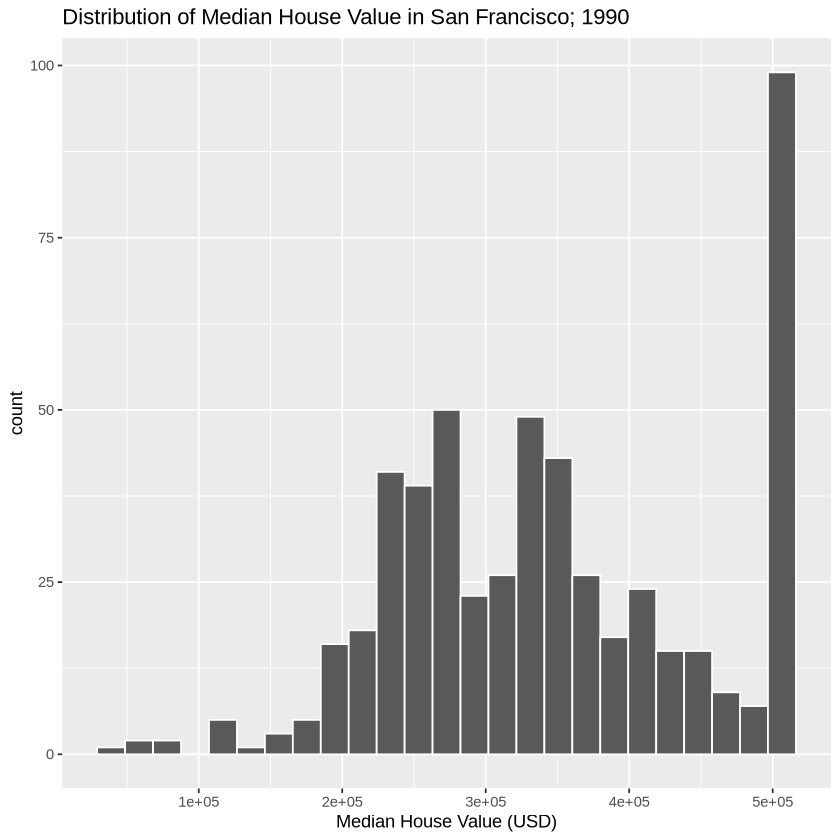

In [28]:
#Plot distribution of sample from sf_homes
sf_homes_dist <- sf_homes %>%
    ggplot(aes(x = Median_House_Value)) + 
        geom_histogram(bins = 25, color = 'white') +
        labs(title = "Distribution of Median House Value in San Francisco; 1990") +
        xlab("Median House Value (USD)")

sf_homes_dist

To conclude the explanatory data analysis we've included more summary statistics of the sample sets. Notice that the *Max House Price* for both Los Angeles and San Francisco are equal which shows that the original data set has a cap on these values. In order to properly compare these two cities we'll need to further filter our sample sets to not include these values. 

|City |Average House Price|Min House Price|Max House Price|Median House Price|
|-----|:-----------------:|:-------------:|:-------------:|:----------------:|
|San Francisco |344885    |32500          |500001         |335100            |
|Los Angeles   |246328    |17500          |500001         |205000            |
<div style="text-align: center"> <h5>Table 1: Summary Statistics for San Francisco and Los Angeles</h5></div>

#### Methods:
##### Why Trustworthy？
Our original dataset represents median house prices across California districts, sourced from the 1990 census, which is quality and dependable.
As the original data does not classify these observations into distinct cities, we distinguish between Los Angeles and San Francisco by using ‘longitude’ and ‘latitude’ coordinates based on the approximate boundaries of these two cities.  

The dataset contains 20,640 observations, which is a substantial sample size that guarantees the robustness of our analysis, eliminating concerns about potential invalidity due to a limited number of data points.

##### Limitation of Preliminary Result
In our analysis, we chose the variable *Median_House_Value*, which denotes the median house value within a block, to represent the house price in a certain block. In our preliminary findings, we observed that the average house price in San Francisco is higher than Los Angeles. However, solely presenting population parameters in statistical research fails to convey the uncertainty and potential error in estimates. Besides, without confidence intervals, effect sizes, and hypothesis testing outcomes, stakeholders lack a full understanding of the data's reliability and applicability, which is essential for making informed decisions.


##### Solution
To address this limitation, we intend to conduct a hypothesis test with a 95% confidence interval to ascertain the differences in house values between Los Angeles and San Francisco. 

##### Hypothesis Test: 
μ<sub>1</sub> represents the median house price for all blocks in the San Francisco area, while μ<sub>2</sub> represents the median house price for all blocks in the Los Angeles area.  
H<sub>0</sub>: μ<sub>1</sub> − μ<sub>2</sub> = 0  
H<sub>A</sub>: μ<sub>1</sub> − μ<sub>2</sub> > 0

Since the median is a type of aggregate of variables, the Central Limit Theorem (CLT) is relevant and applicable in this context. Therefore, we will employ both bootstrapping and asymptotic methods to validate our hypothesis test and will compare the results produced by these two methodologies.

##### Reflection:
We expect to find that the median house price for all blocks in the San Francisco area is greater than in Los Angeles, which is reflected in our alternative hypothesis.
Findings concerning the difference in average housing prices between San Francisco and Los Angeles can have many impacts. For example, homebuyers and investors may consider the findings when deciding where to purchase properties in these two popular cities. Additionally, the findings of this report can be used to investigate economic disparities between the two cities, as housing is a leading economic indicator.
Future questions that may arise from this report will be dependent on the findings. If one city has a significantly higher average housing price, it would be natural to ask questions about the long-term trend in price difference between the cities and the causes of this price difference.


#### References:
Glaeser, E., & Gyourko, J. (n.d.). The economic implications of Housing Supply. Journal of Economic Perspectives. https://www.aeaweb.org/articles?id=10.1257%2Fjep.32.1.3  
Hipp, J. R., & Singh, A. (2014). Changing neighborhood determinants of housing price trends in Southern California, 1960–2009. City &amp; Community, 13(3), 254–274. https://doi.org/10.1111/cico.12071 

### Further filter the sample sets to only include median house values that are less than 500001

In [29]:
# Further filter the sample sets to only include median house values that are less than 500001
la_homes <- la_homes %>%
    filter(Median_House_Value < 500001)

sf_homes <- sf_homes %>%
    filter(Median_House_Value < 500001)

# Recalculate the average house value from the newly filtered sample sets
la_homes_mean <- mean(la_homes$Median_House_Value)
la_homes_sample_sd <- sd(la_homes$Median_House_Value)
sf_homes_mean <- mean(sf_homes$Median_House_Value)
sf_homes_sample_sd <- sd(sf_homes$Median_House_Value)

la_homes_mean
la_homes_sample_sd
nrow(la_homes)
sf_homes_mean
sf_homes_sample_sd
nrow(sf_homes)

[1] 218317.1

[1] 101405.4

[1] 2409

[1] 313164.9

[1] 85907.79

[1] 445

|City |Previous Mean of the Median House Value|New Mean of the Median House Value|Sample Standard Deviation ($s$)|Sample size ($n$)|
|-----|:-------------------------------------:|:--------------------------------:|:-----------------------------:|:---------------:|
|San Francisco |344885.244402985              |313164.943820225                  |85907.7880496039               |445              |
|Los Angeles   |246327.501308411              |218317.061021171                  |101405.430611342               |2409             |
<div style="text-align: center"> <h5>Table 2: Sample statistics for San Francisco and Los Angeles</h5></div>

### Draw smaller samples for SF & LA house value
##### let's say the sample size for n(la) = 40, n(sf) = 50

In [46]:
la_house_sample <- la_homes |>
        select(Median_House_Value) |>
        rep_sample_n(size = 40, replace = F)

sf_house_sample <- sf_homes |>
        select(Median_House_Value) |>
        rep_sample_n(size = 40, replace = F)

x2 <- mean(la_house_sample$Median_House_Value)
s2 <- sd(la_house_sample$Median_House_Value)
x1 <- mean(sf_house_sample$Median_House_Value)
s1 <- sd(sf_house_sample$Median_House_Value)
n1 <- nrow(la_house_sample)
n2 <- nrow(sf_house_sample)

cali_house_summary <- 
        tibble(
          x2,
            x1,
            s1,
            s2,
            n1,
            n2
            )

head(la_house_sample)
head(sf_house_sample)
cali_house_summary

replicate,Median_House_Value
<int>,<dbl>
1,93400
1,214800
1,166300
1,462900
1,233500
1,250000


replicate,Median_House_Value
<int>,<dbl>
1,350000
1,112500
1,185300
1,393800
1,284900
1,222700


x2,x1,s1,s2,n1,n2
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
191732.5,295665,92420.66,88102.61,40,40



## Hypothesis Test Based on Central Limit Theorem to estimate the difference in mean 
#### First, we use Central Limit Theorem to estimate the difference in mean for the Los Angeles median house value and San Francisco median house value by calculate the 95% confidence interval. (We use 0.05 significant level)

#### Below are copied from worksheet 7, need either remove or citation? up to you guys

Assuming the sample size is large enough, we can approximate the sampling distribution of $\bar{X}_1-\bar{X}_2$ by
$$
\bar{X}_1-\bar{X}_2\sim N\left(\mu_1 - \mu_2, \sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}\right)
$$

Therefore, you can obtain the confidence interval as

$$
CI\left(\mu_1 - \mu_2\right) = \left(\bar{X}_1-\bar{X}_2\right) \pm z^*\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}
$$
where $z^*$ is the quantile of a standard Normal.

_(Note: we could get an even better approximation of the sampling distribution using the $t$-distribution. We are going to talk about $t$-distribution next week. However, for large $n$, say $n>30$, the $t$-distribution is quite close to the normal distribution. For $n>50$ they are virtually the same.)_








In [47]:
house_value_diff_means_ci <- 
    tibble(
        lower_ci = x1 - x2 - qnorm(0.975) * sqrt(s1^2/n1 + s2^2/n2),
        upper_ci = x1 - x2 + qnorm(0.975) * sqrt(s1^2/n1 + s2^2/n2)
    )

house_value_diff_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
64363.01,143502


#### Apparently the 0 is not included in the 95% confidence interval. This provide us an evidence that we're 95% of confident that the true diff of mean (x1-x2) is not 0, and is actually somewhere between 64363.01 and 143502

### Hypothesis Testing: two samples t-test based on CLT

$\mu_1$ = Mean Value for San Francisco median house price  
$\mu_2$ = Mean Value for Los Angeles median house price  
$\alpha$ = 0.05

##### Formulate Hypotheses:
$H_0$: $\mu_1$ - $\mu_2$ = 0  
$H_A$: $\mu_1$ - $\mu_2$ > 0


##### Calculate Two-Sample $t$-test for Two Independent Samples:
$t_0$ = $\frac{\bar{x_1} - \bar{x_2} - \Delta_0}{\sqrt{\frac{s^{2}_{1}}{n_1} + \frac{s^{2}_{2}}{n_2}}}$  



In [56]:
# Calculate the Two-Sample t-test for Two Independent Samples

delta_0 <- 0

t_0 <- (x1 - x2 - delta_0)/sqrt((s1^2/n1) + (s2^2/n2))

t_0

[1] 5.148005

##### The Null Model follows a t-model with v degrees of freedom:  
$$
\nu = \frac{
    \left(\frac{s_{1}^2}{n_1}+\frac{s_{2}^2}{n_2}\right)^2
}
{
\frac{s_{1}^4}{n_1^2(n_1-1)}+\frac{s_{2}^2}{n_2^2(n_2-1)}
}
$$

##### Calculate the p-value using the right-tailed area:
pt(t_0, df, lower.tail = F)

In [57]:
# Calculate the p-value to compare against the significance level
v = ((s1^2)/n1 + (s2^2)/n2)^2/(s1^4/((n1^2)*(n1-1)) + s2^4/((n2^2)*(n2-1)))

p_value = pt(t_0, v,lower.tail = FALSE)

v
p_value

[1] 77.8221

[1] 9.640724e-07

In [58]:
# Calculate the p-value using t.test function to compare against the significance level
house_value_summary <-
    tidy(
        t.test(x = sf_house_sample$Median_House_Value,
               y = la_house_sample$Median_House_Value,
               alternative = "greater")
        )
house_value_summary

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
103932.5,295665,191732.5,5.148005,9.640724e-07,77.8221,70324.66,Inf,Welch Two Sample t-test,greater


##### p_value < 0.05
##### On a 0.05 significant level, we reject the null hypothesis and conclude that the mean value for San Francisco median house price is greater than the mean value for Los Angeles median house price. The difference is statistically significant and can not to be neglected.
##### As we reject the null hypothesis on a 0.05 significant level, we will also commit to Type I error with a probability of 5%


## Hypothesis Test Based on Bootstrapping to Estimate the Difference in Mean 
### This method is mentioned at the bottom of worksheet 6 Q3

In [110]:
# Resample the la house & sf house with same size as CLT method
set.seed(80)
sf_la_house_sample <- la_homes |>
            select(Median_House_Value) |>
            mutate(City = "LA") |>
            sample_n(size = 40) |>
            bind_rows(
                sf_homes |>
                select(Median_House_Value) |>
                mutate(City = "SF") |>
                sample_n(size= 40)
                )


head(sf_la_house_sample)

Median_House_Value,City
<dbl>,<chr>
154200,LA
332500,LA
270000,LA
397500,LA
226700,LA
171300,LA


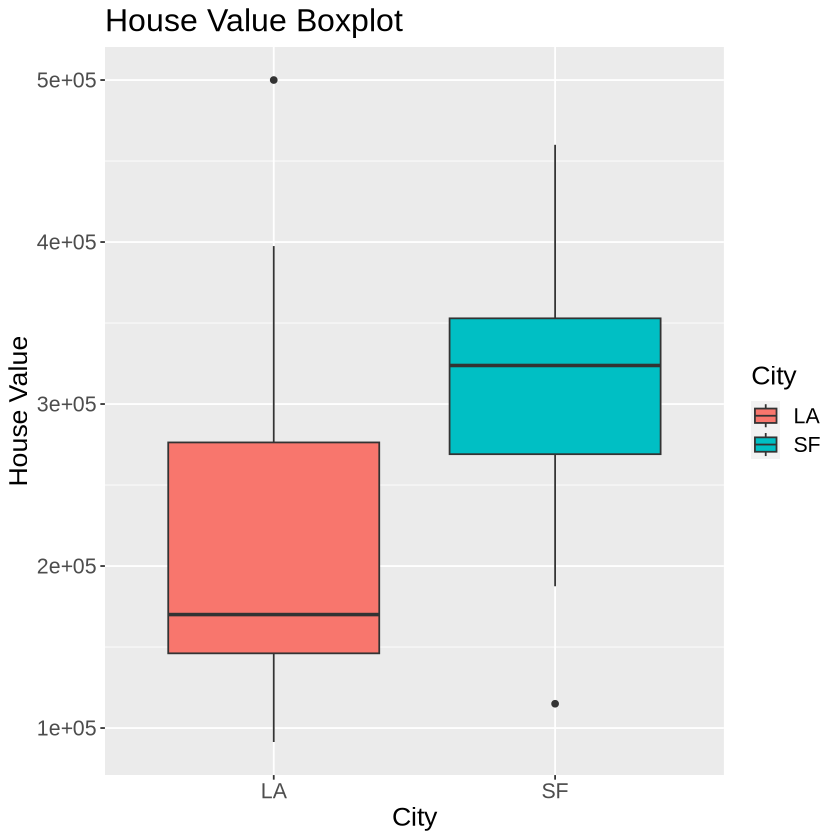

In [118]:
# Visualization

house_sample_boxplots <-
    sf_la_house_sample%>% 
    ggplot() +
    geom_boxplot(aes(x = City, y = Median_House_Value, fill = City)) +
    theme(text = element_text(size = 16)) +
    ggtitle("House Value Boxplot") + 
    xlab("City") + 
    ylab("House Value") 

house_sample_boxplots

In [111]:
# Find the observed diff in mean for the sample

obs_mean_diff <- 
    sf_la_house_sample %>% 
    filter(City %in% c("LA", "SF")) %>%
    group_by(City) %>% 
    summarise(mean = mean(Median_House_Value	)) %>%
    pivot_wider(names_from = City, values_from = mean) %>%
    transmute(diff = SF - LA) %>%
    pull(diff)
obs_mean_diff

[1] 104990

#### Observed value for diff in mean (SF-LA )in our sample is 105180

In [112]:
# Null Distribution based on bootstrapping (5000 reps)
set.seed(5000)

null_model_house <- 
   sf_la_house_sample %>% 
   specify(formula = Median_House_Value ~ City ) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 5000, type = "permute") %>% 
   calculate(stat="diff in means", order = c("SF", "LA"))

head(null_model_house)

replicate,stat
<int>,<dbl>
1,-46800
2,-40725
3,53330
4,22275
5,-12540
6,310


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”
Warning message in min(diff(unique_loc)):
“no non-missing arguments to min; returning Inf”


p_value
<dbl>
0


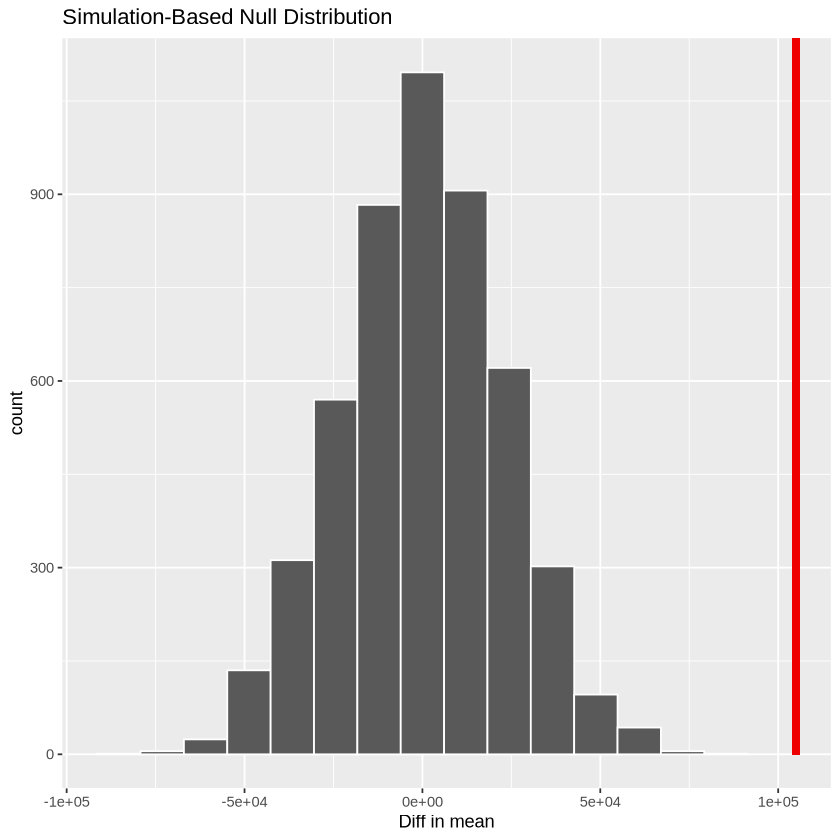

In [113]:
# Visualize the Null Model of Hypothesis Test and Get the P_value

house_result_plot <- 
   null_model_house %>%
   visualize() + 
    xlab("Diff in mean") +
   shade_p_value(obs_stat = obs_mean_diff , direction = "right")

p_value_2 <- null_model_house |>
        get_p_value(obs_stat = obs_mean_diff, direction = "greater")


house_result_plot
p_value_2

#### Reject null hypothesis, commit to Type I Error